In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import nibabel as nib
import glob
import os.path
import scipy

In [182]:
path = os.path.join('C:\\Users\\310304075\\Desktop\\test/*')

image_list = []
image_names = []
for filename in glob.glob(path):
    im=nib.load(filename)
    data0 = im.get_fdata()
    data1a = data0[:,:,50]
    data1b = data0[:,:,60]
    data1c = data0[:,:,70]
    data1d = data0[:,:,80]
    data1e = data0[:,:,90]
    data1f = data0[:,:,100]
    data1g = data0[:,:,110]
    data1h = data0[:,:,120]
    data1i = data0[:,:,130]
    data1j = data0[:,:,140]
    data1l = data0[:,:,40]
    data1m = data0[:,:,150]
    data1n = data0[:,:,160]
    data1o = data0[:,:,170]
    data2a = scipy.ndimage.zoom(data1a, (0.5, 0.5), order=3)
    data2b = scipy.ndimage.zoom(data1b, (0.5, 0.5), order=3)
    data2c = scipy.ndimage.zoom(data1c, (0.5, 0.5), order=3)
    data2d = scipy.ndimage.zoom(data1d, (0.5, 0.5), order=3)
    data2e = scipy.ndimage.zoom(data1e, (0.5, 0.5), order=3)
    data2f = scipy.ndimage.zoom(data1f, (0.5, 0.5), order=3)
    data2g = scipy.ndimage.zoom(data1g, (0.5, 0.5), order=3)
    data2h = scipy.ndimage.zoom(data1h, (0.5, 0.5), order=3)
    data2i = scipy.ndimage.zoom(data1i, (0.5, 0.5), order=3)
    data2j = scipy.ndimage.zoom(data1j, (0.5, 0.5), order=3)
    data2l = scipy.ndimage.zoom(data1l, (0.5, 0.5), order=3)
    data2m = scipy.ndimage.zoom(data1m, (0.5, 0.5), order=3)
    data2n = scipy.ndimage.zoom(data1n, (0.5, 0.5), order=3)
    data2o = scipy.ndimage.zoom(data1o, (0.5, 0.5), order=3)
    data3a= data2a.reshape(-1)
    data3b= data2b.reshape(-1) 
    data3c= data2c.reshape(-1)
    data3d= data2d.reshape(-1) 
    data3e= data2e.reshape(-1)
    data3f= data2f.reshape(-1)
    data3g= data2g.reshape(-1) 
    data3h= data2h.reshape(-1)
    data3i= data2i.reshape(-1) 
    data3j= data2j.reshape(-1)
    data3l= data2l.reshape(-1) 
    data3m= data2m.reshape(-1)
    data3n= data2n.reshape(-1) 
    data3o= data2o.reshape(-1)
    data4 = np.hstack((data3a,data3b,data3c,data3d,data3e,data3f,data3g,data3h,data3i,data3j,data3l,data3m,data3n,data3o))
    image_list.append(data4)
    image_names.append(filename)
    

(99, 2240000)


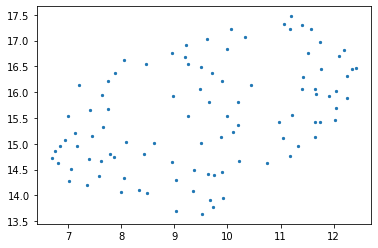

In [183]:
print (np.shape(image_list))
standard_embedding = umap.UMAP(random_state=42).fit_transform(image_list)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=5, cmap='Spectral');

In [184]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0,
    n_components=2,
    random_state=42,
).fit_transform(image_list)

In [185]:
#print (clusterable_embedding)
labels = hdbscan.HDBSCAN(
    min_samples=4,
    min_cluster_size=10,
).fit_predict(clusterable_embedding)
print (labels)

[-1  2  2  2  0  1  0  2 -1  2  0  0  1 -1 -1  1  1  2  0  2  0  0  1 -1
 -1  1  1  2  0  2  2  1  1  1  1  1  2  2  0  0  2 -1  0  0  2  1  1  2
  0  0  2  2 -1  1  0  1  1  0  2  0  1  1  2  0 -1  1  2  1  1  2  1  0
 -1  1  1  1  0  0  2 -1 -1  2  0  0  2 -1  2  0  1 -1  0  2  2  0  2  0
  1  2  2]


0.8585858585858585


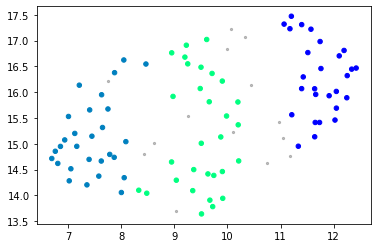

In [191]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=5,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=20,
            cmap='winter');
print (np.sum(clustered / 99))

In [196]:
from pandas import DataFrame

df = DataFrame({'name': image_names, 'cluster': labels,'name': image_names, 'pos0': standard_embedding[:,0],'pos1': standard_embedding[:,1]})

df.to_excel('C:\\Users\\310304075\\Desktop\\test.xlsx', sheet_name='sheet1', index=False)